### **Reproducibility**

In [2]:
import numpy as np
import tensorflow as tf

#random seeds foe all random processes to give the same results every time i run the code
np.random.seed(42)
tf.random.set_seed(42)

### **Load and Preprocess WESAD Dataset**

In [3]:
import os
import pickle
import numpy as np

data_path = r"D:\Downloads\WESAD\WESAD"
subjects = ["S2/S2.pkl", "S3/S3.pkl", "S4/S4.pkl", "S5/S5.pkl", "S6/S6.pkl",
            "S7/S7.pkl", "S8/S8.pkl", "S9/S9.pkl", "S10/S10.pkl", "S11/S11.pkl",
            "S13/S13.pkl", "S14/S14.pkl", "S15/S15.pkl", "S16/S16.pkl", "S17/S17.pkl"]

all_features = [] # to store the features of all windows
all_labels = [] # to store the labels of all windows

# Loop through each subject's data file
for subject in subjects:
    file_path = os.path.join(data_path, subject)

    # Load the data from the pickle file
    with open(file_path, "rb") as f:
        data = pickle.load(f, encoding="latin1")

    # Extract the ECG data and labels
    ecg_data = data['signal']['chest']['ECG']
    labels = data['label']

    #Windowing the ECG data
    window_size = 700 * 5 # 5 seconds of data at 700Hz
    step = window_size // 2 # 50% overlap

    # Loop through the ECG data with a sliding window
    for i in range(0, len(ecg_data) - window_size + 1, step):
        window = ecg_data[i:i+window_size]
        label = labels[i + window_size//2]

        # Check if the label is 2 (stress) or 1 (baseline)
        if label in [1, 2]:
            
            # Extract features from the window
            features = [
                np.mean(window),
                np.std(window),
                np.max(window),
                np.min(window),
                np.median(window)
            ]

            #convert it to binary classification 1-> 0(no stress) 0 and 2->1 (stress)
            binary_label = 0 if label == 1 else 1
            all_features.append(features)
            all_labels.append(binary_label)



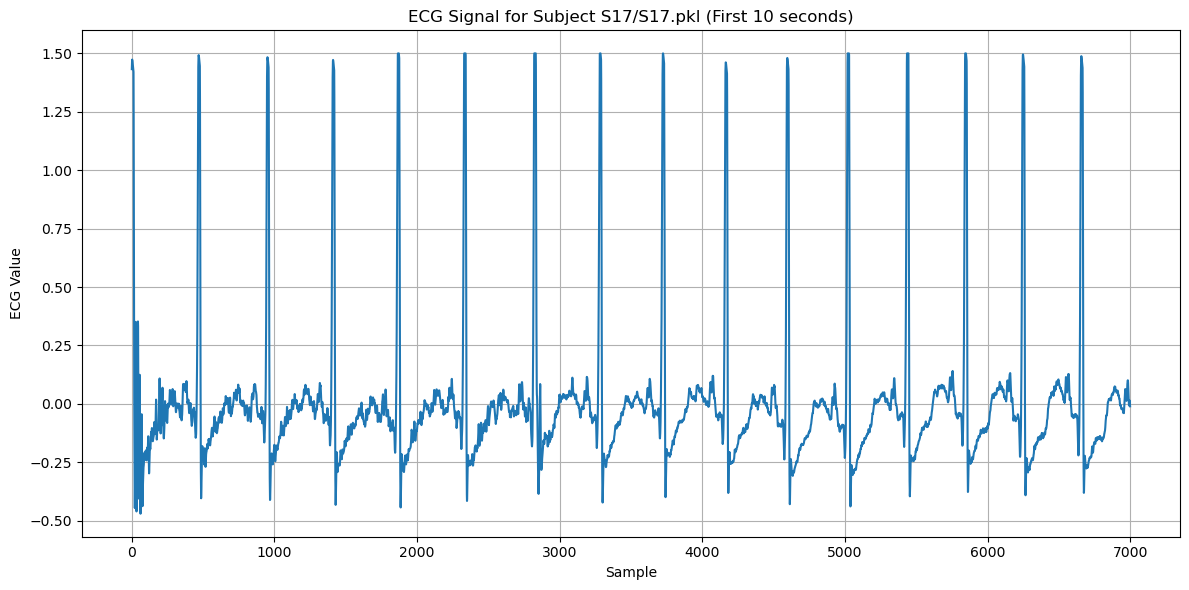

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

ecg_data = data['signal']['chest']['ECG']
df_eda = pd.DataFrame(ecg_data)

sampling_rate = 700
duration_seconds = 10
samples_to_plot = sampling_rate * duration_seconds


plt.figure(figsize=(12, 6))
plt.plot(df_eda.index[:samples_to_plot], df_eda.values[:samples_to_plot])
plt.title(f"ECG Signal for Subject {subject} (First {duration_seconds} seconds)")
plt.xlabel("Sample")
plt.ylabel("ECG Value")
plt.grid(True)
plt.tight_layout()
plt.show()


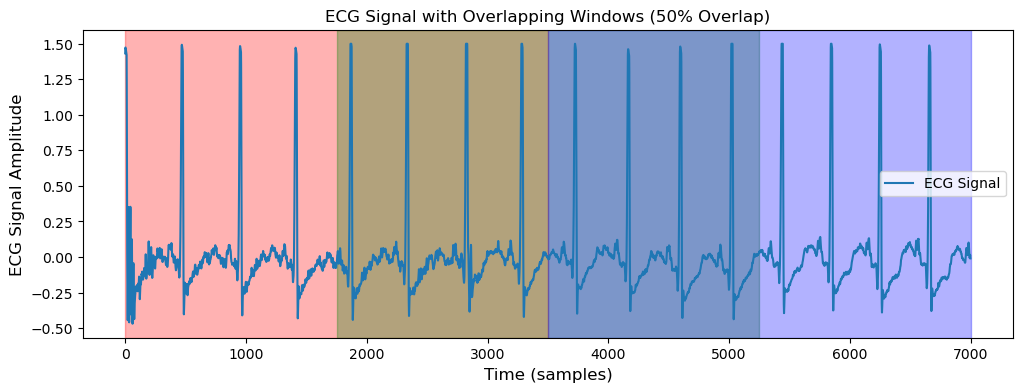

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ecg_data and window_size, step_size are already defined
plt.figure(figsize=(12, 4))

# Plot the full ECG signal (for a subset or a portion)
plt.plot(ecg_data[:window_size + 2*step], label='ECG Signal')

# Loop through to add the overlapping windows (with different colors for each window)
for i in range(3):  # Adjust this for more windows if needed
    start = i * step
    plt.axvspan(start, start + window_size, alpha=0.3, color=['red', 'green', 'blue'][i])

plt.title("ECG Signal with Overlapping Windows (50% Overlap)")
plt.xlabel("Time (samples)", fontsize=12)
plt.ylabel("ECG Signal Amplitude", fontsize=12)
plt.legend()
plt.show()


### **Data Cleaning and Splitting**

In [8]:
from sklearn.model_selection import train_test_split

# Convert lists to numpy arrays for easier manipulation
X = np.array(all_features)
y = np.array(all_labels)

# Remove NaNs
valid = ~np.isnan(X).any(axis=1)
X = X[valid]
y = y[valid]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### **Standardization and Oversampling**

In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


### **Model And Evaluation**


Training with ADAM - Batch Size: 16
Epoch 1/40


c:\Users\Hagar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7429 - loss: 0.4971 - val_accuracy: 0.8586 - val_loss: 0.3604
Epoch 2/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.3763 - val_accuracy: 0.8713 - val_loss: 0.3315
Epoch 3/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8393 - loss: 0.3494 - val_accuracy: 0.8779 - val_loss: 0.2967
Epoch 4/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8546 - loss: 0.3244 - val_accuracy: 0.8767 - val_loss: 0.3024
Epoch 5/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8620 - loss: 0.3029 - val_accuracy: 0.8897 - val_loss: 0.2704
Epoch 6/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8755 - loss: 0.2902 - val_accuracy: 0.8903 - val_loss: 0.2668
Epoch 7/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8775 - loss: 0.2815 - val_accuracy: 0.8952 - val_loss: 0.2585
Epoch 8/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.2749 - val_accuracy: 0.8958 - val_

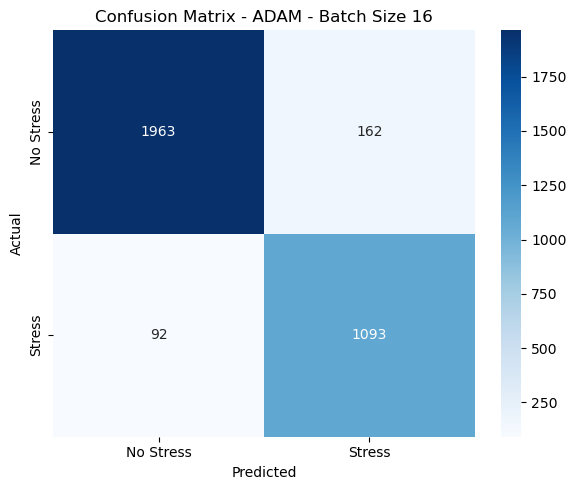

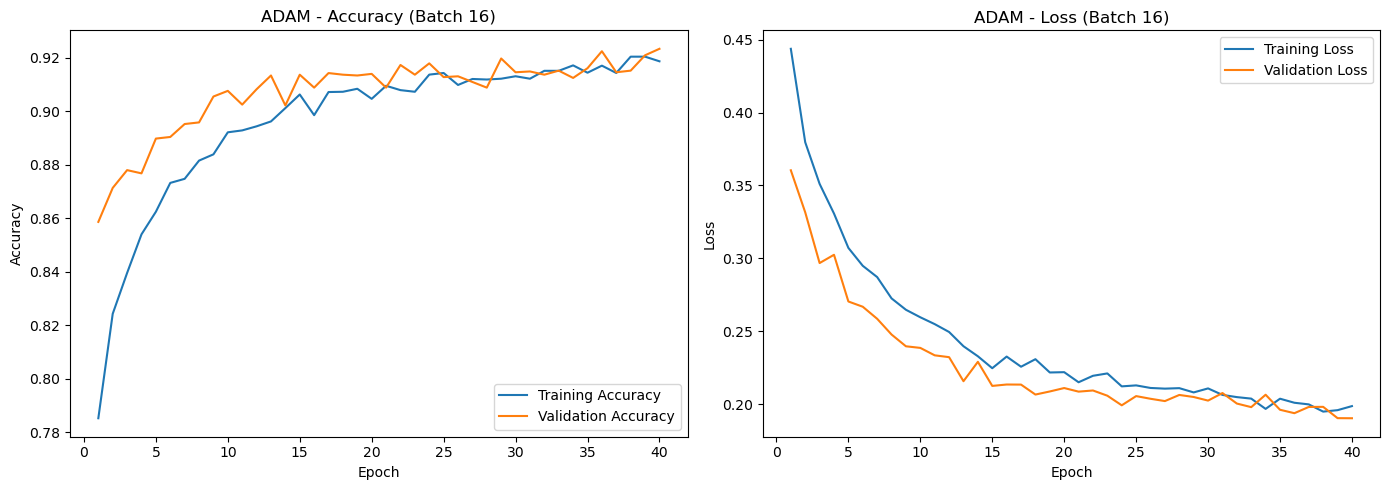


Training with ADAM - Batch Size: 64
Epoch 1/40


c:\Users\Hagar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7050 - loss: 0.5419 - val_accuracy: 0.8468 - val_loss: 0.3855
Epoch 2/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8140 - loss: 0.3899 - val_accuracy: 0.8498 - val_loss: 0.3645
Epoch 3/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8279 - loss: 0.3720 - val_accuracy: 0.8556 - val_loss: 0.3459
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8425 - loss: 0.3515 - val_accuracy: 0.8595 - val_loss: 0.3466
Epoch 5/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8441 - loss: 0.3423 - val_accuracy: 0.8644 - val_loss: 0.3232
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.3289 - val_accuracy: 0.8698 - val_loss: 0.3106
Epoch 7/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3162 - val_accuracy: 0.8653 - val_loss: 0.3149
Epoch 8/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.3048 - val_accuracy: 0.8746 - val_

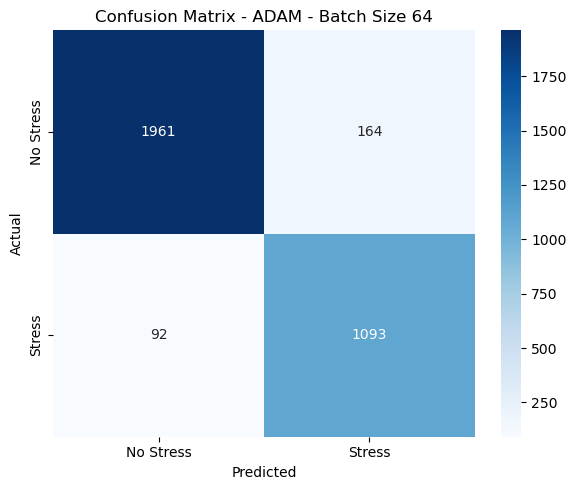

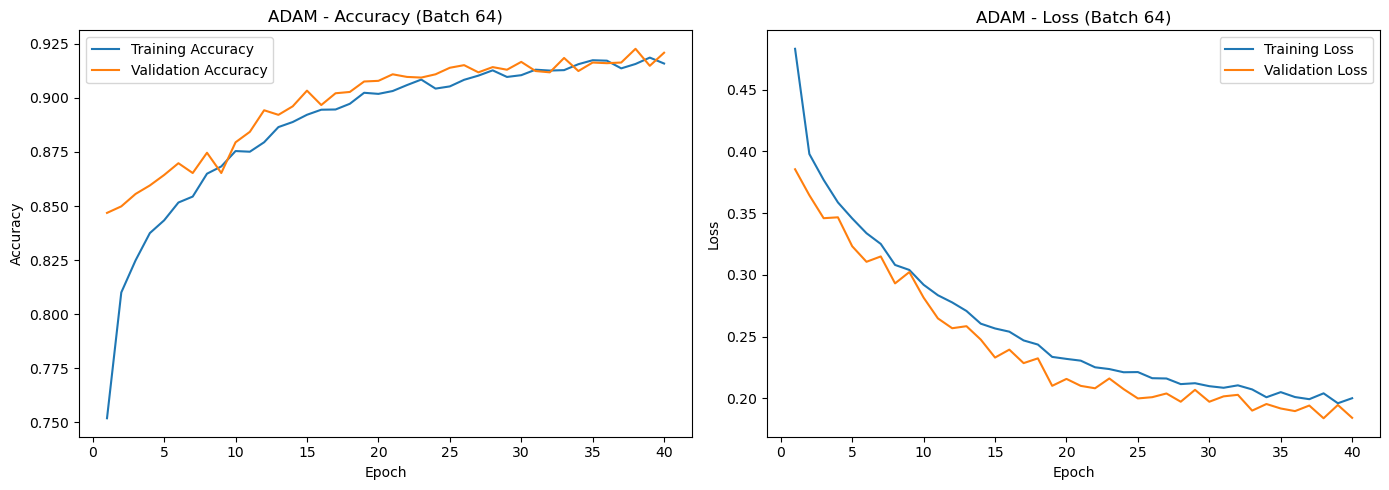


Training with SGD - Batch Size: 16
Epoch 1/40


c:\Users\Hagar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5554 - loss: 0.6787 - val_accuracy: 0.7511 - val_loss: 0.5719
Epoch 2/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7111 - loss: 0.5522 - val_accuracy: 0.7991 - val_loss: 0.4670
Epoch 3/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7527 - loss: 0.4887 - val_accuracy: 0.8148 - val_loss: 0.4357
Epoch 4/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7665 - loss: 0.4629 - val_accuracy: 0.8375 - val_loss: 0.4140
Epoch 5/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7849 - loss: 0.4403 - val_accuracy: 0.8456 - val_loss: 0.3989
Epoch 6/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4244 - val_accuracy: 0.8495 - val_loss: 0.3826
Epoch 7/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7976 - loss: 0.4189 - val_accuracy: 0.8562 - val_loss: 0.3715
Epoch 8/40
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8081 - loss: 0.4047 - val_accuracy: 0.8601 - val_

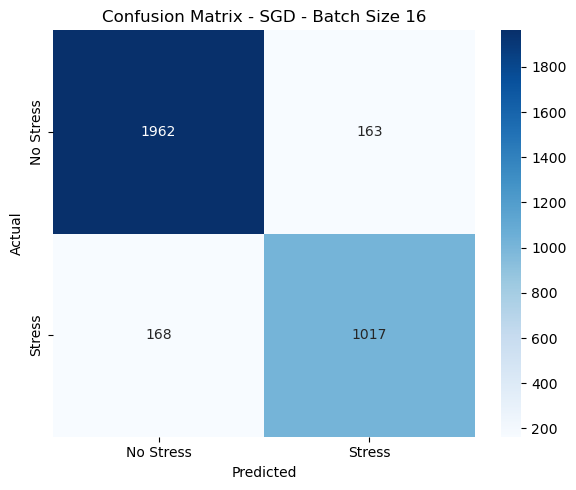

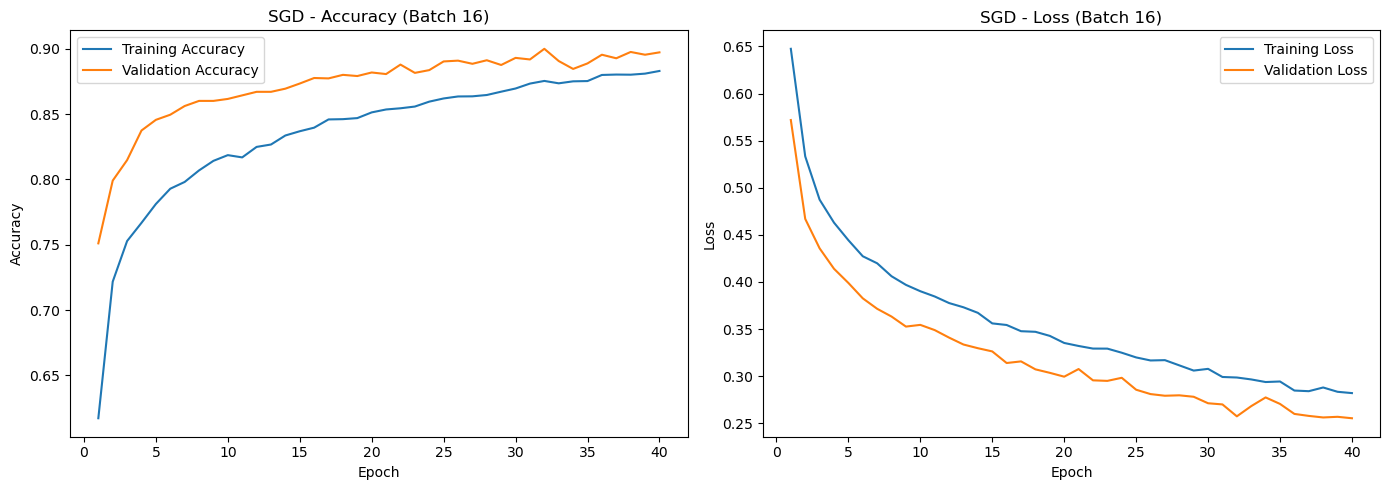


Training with SGD - Batch Size: 64
Epoch 1/40


c:\Users\Hagar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5013 - loss: 0.6954 - val_accuracy: 0.5915 - val_loss: 0.6777
Epoch 2/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.6681 - val_accuracy: 0.7054 - val_loss: 0.6458
Epoch 3/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6716 - loss: 0.6361 - val_accuracy: 0.7505 - val_loss: 0.6004
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5981 - val_accuracy: 0.7807 - val_loss: 0.5505
Epoch 5/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5621 - val_accuracy: 0.7961 - val_loss: 0.5095
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7397 - loss: 0.5296 - val_accuracy: 0.8145 - val_loss: 0.4794
Epoch 7/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7503 - loss: 0.5072 - val_accuracy: 0.8248 - val_loss: 0.4560
Epoch 8/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7555 - loss: 0.4952 - val_accuracy: 0.8290 - val_

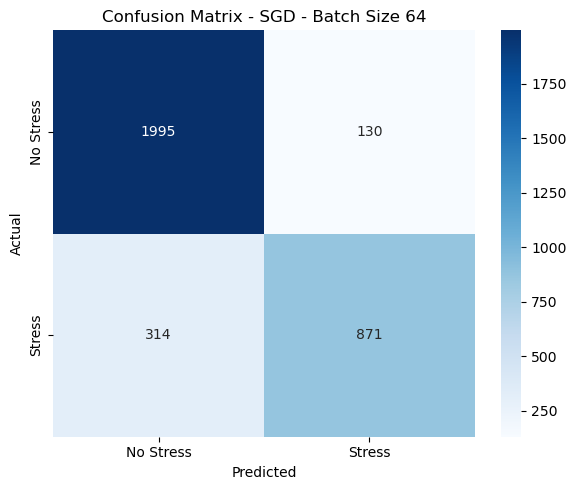

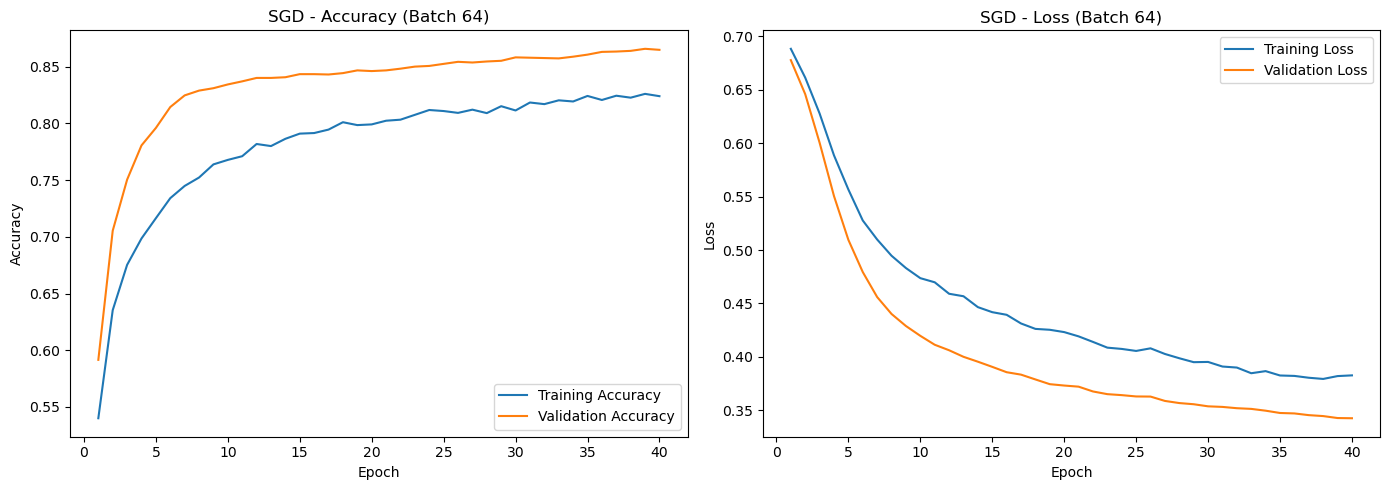

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Model parameters
input_dim = X_train.shape[1]
dropout_rate = 0.2
epochs = 40
batch_sizes = [16, 64]

for optimizer_name in ['adam', 'sgd']:
    for batch_size in batch_sizes:
        print(f"\nTraining with {optimizer_name.upper()} - Batch Size: {batch_size}")

        model = Sequential([
            Dense(64, activation='relu', input_shape=(input_dim,)),
            Dropout(dropout_rate),
            Dense(128, activation='relu'),
            Dropout(dropout_rate),
            Dense(256, activation='relu'),
            Dropout(dropout_rate),
            Dense(128, activation='relu'),
            Dropout(dropout_rate),
            Dense(1, activation='sigmoid')  # Binary classification
        ])

        optimizer = Adam(learning_rate=0.001) if optimizer_name == 'adam' else SGD(learning_rate=0.01)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluate
        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate F1 Score
        f1 = f1_score(y_test, y_pred)

        # Print Accuracy and F1 Score
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['No Stress', 'Stress']))

        # Confusion Matrix
        plt.figure(figsize=(6, 5))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Stress', 'Stress'],
                    yticklabels=['No Stress', 'Stress'])
        plt.title(f'Confusion Matrix - {optimizer_name.upper()} - Batch Size {batch_size}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

        # Training History
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(1, len(acc) + 1)

        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.title(f'{optimizer_name.upper()} - Accuracy (Batch {batch_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.title(f'{optimizer_name.upper()} - Loss (Batch {batch_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()